In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 결측치 시각화를 위한 라이브러리
import missingno

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

### 데이터를 불러온다.

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
# 이 둘을 합친 데이터 프레임을 생성한다.
# 이 두 데이터는 원래 하나의 데이터이다. 
# 본 예제에서는 모든 결측치를 채워보는 연습을 할 것이다.
# 그래서 결측치를 채우기 위한 값을 구하기 위해 하나로 합친다.

# 향후 모든 전처리가 끝나면 다시 분리할 것인데 Survived가 결측치가 아닌 것이
# 학습용 데이터이고 결측치인 것이 예측해야할 데이터 이므로 이 것을 이용하여 나눈다.
all_df = pd.concat([train_df, test_df])
all_df.reset_index(inplace=True, drop=True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### PassengerId
- 이 데이터는 1부터 1씩 증가시킨 의미가 없는 값이다.
- 제거한다.

In [4]:
all_df.drop('PassengerId', axis=1, inplace=True)
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Pclass

In [5]:
# 결측치 확인
all_df['Pclass'].isna().sum()

0

In [6]:
# 이상치 확인
# Pclass는 0, 1, 2 셋중에 하나로 구성되어 있다.
all_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

- 결측치도 없고 이상치도 없으므로 넘어간다.

### Name
- Name에서 LastName과 Title을 추출하여 컬럼으로 추가해준다.

In [7]:
# 결측치 확인
all_df['Name'].isna().sum()

0

In [8]:
# LastName을 추출하여 컬럼으로 추가해준다.
def get_last_name(name) :
    a1 = name.split(',')
    return a1[0].strip()

all_df['LastName'] = all_df['Name'].apply(get_last_name)
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware


In [9]:
# Title 을 추출하여 컬럼으로 추가해준다.
def get_title(name) :
    a1 = name.split(',')
    a2 = a1[1].split('.')
    return a2[0].strip()
    
all_df['Title'] = all_df['Name'].apply(get_title)
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr


### Sex

In [10]:
# 결측치 확인
all_df['Sex'].isna().sum()

0

In [11]:
# 이상치 확인
# Sex는 male과 female로 구성되어 있다.
all_df['Sex'].unique()

array(['male', 'female'], dtype=object)

- 결측치도 없고 이상치도 없으므로 그냥 넘어간다.

### Age

In [12]:
# 나이에 대한 결측치를 확인한다.
all_df['Age'].isna().sum()

263

In [13]:
# 연령대(Ages) 컬럼을 만들어 붙혀준다.
all_df['Ages'] = all_df['Age'] // 10 * 10
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,Ages
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,20.0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,30.0
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,20.0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,30.0
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,NaN
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,30.0
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,30.0
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,NaN


### Ages

In [14]:
# 결측치 확인
all_df['Ages'].isna().sum()

263

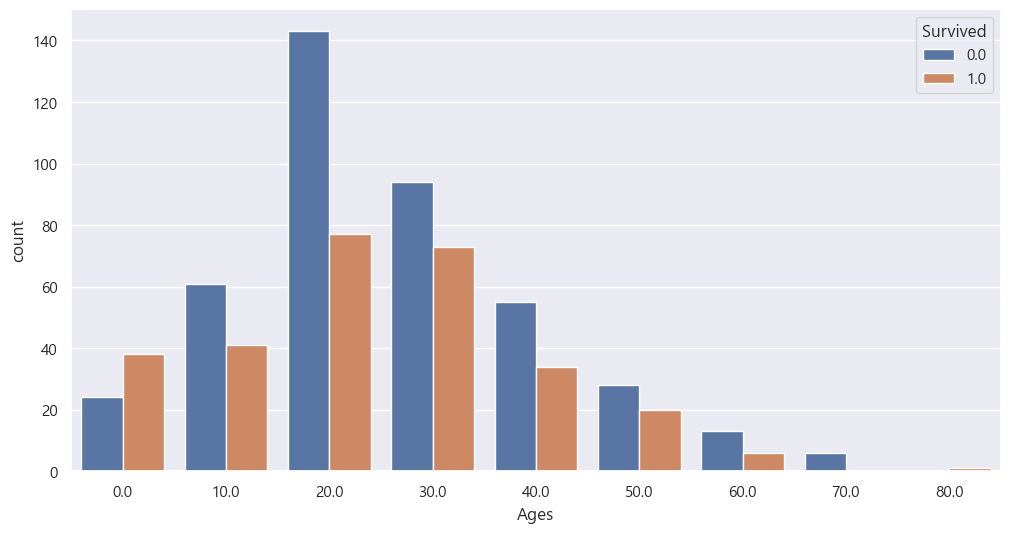

In [15]:
# Ages와 Survived와의 관계
sns.countplot(data=all_df, x='Ages', hue='Survived')
plt.show()

- 0세대와 80대는 생존률이 높고 나머지는 사망율이 높다

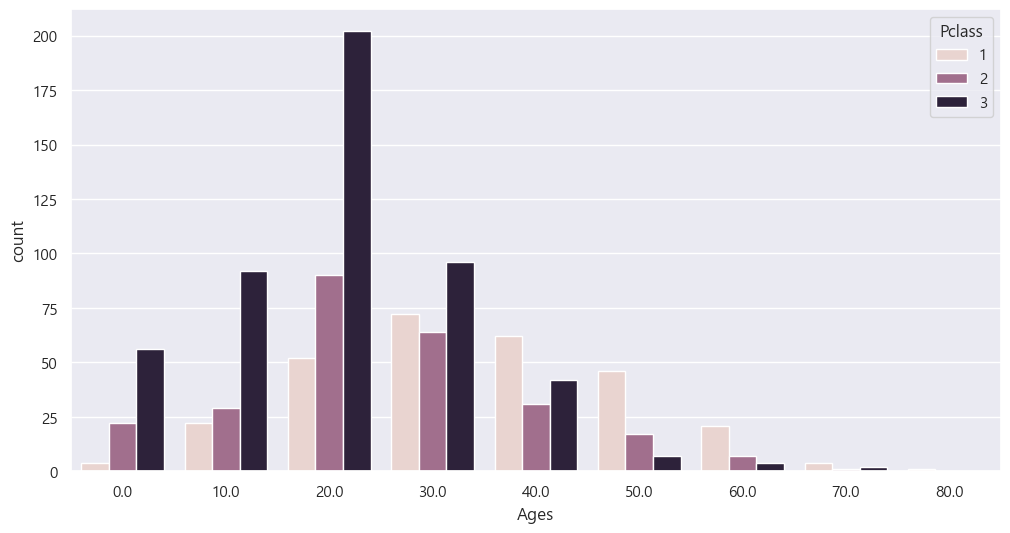

In [16]:
# Ages와 Pclass간의 관과
sns.countplot(data=all_df, x='Ages', hue='Pclass')
plt.show()

- 0, 10, 20 대는 3등석 > 2등석 > 1등석 순이다
- 30, 40대는 3등석 > 1등석 > 2등석 순이다.
- 그 외에는 1등식 > 2등석 > 3등석 순이다.

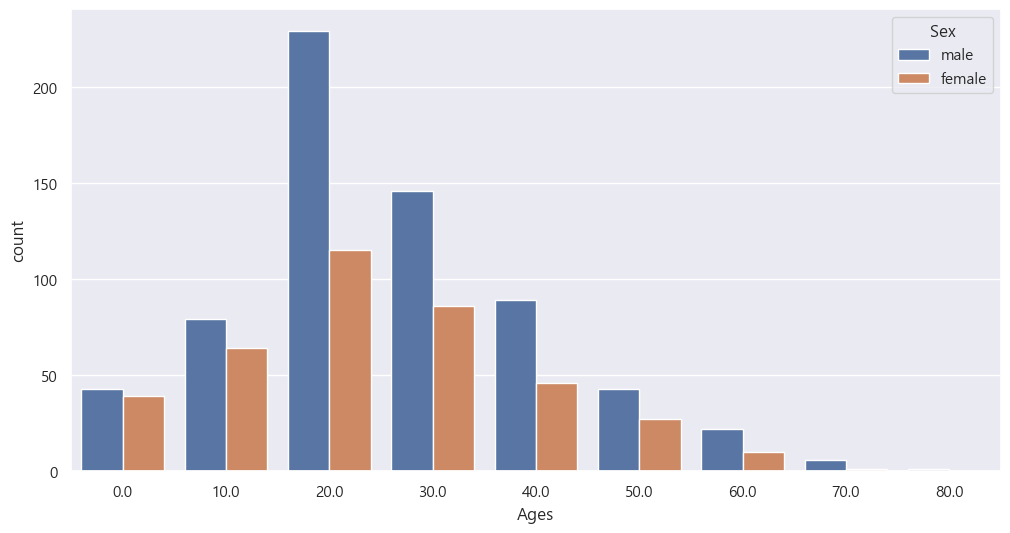

In [17]:
# Ages와 Sex와의 관계
sns.countplot(data=all_df, x='Ages', hue='Sex')
plt.show()

- 모든 연령대에서 남자가 높으므로 성별은 연령대를 추정하는데 적합하지 않는다

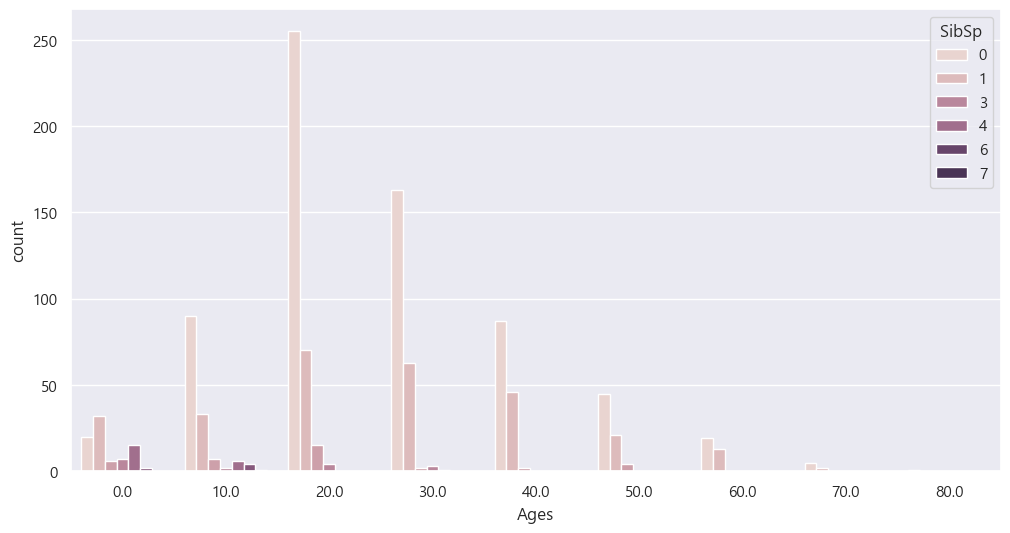

In [18]:
# 연령대와 SibSp와의 관계
sns.countplot(data=all_df, x='Ages', hue='SibSp')
plt.show()

- Ages를 추정하는데 애매한 부분이 있어서 제외한다..

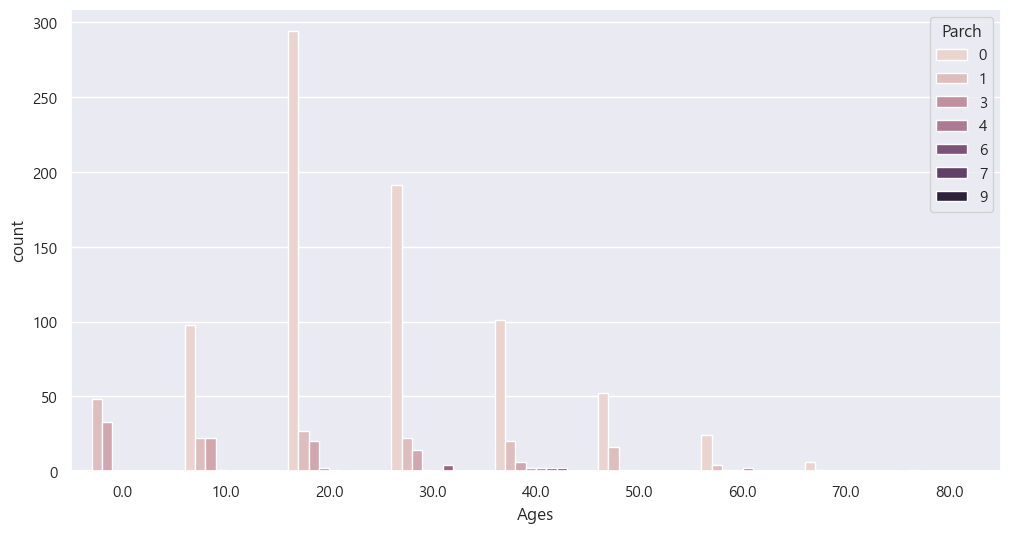

In [19]:
# 연령대와 Parch와의 관계
sns.countplot(data=all_df, x='Ages', hue='Parch')
plt.show()

- 모든 연령대가 비슷하므로 Ages를 추정하는데 제외한다.

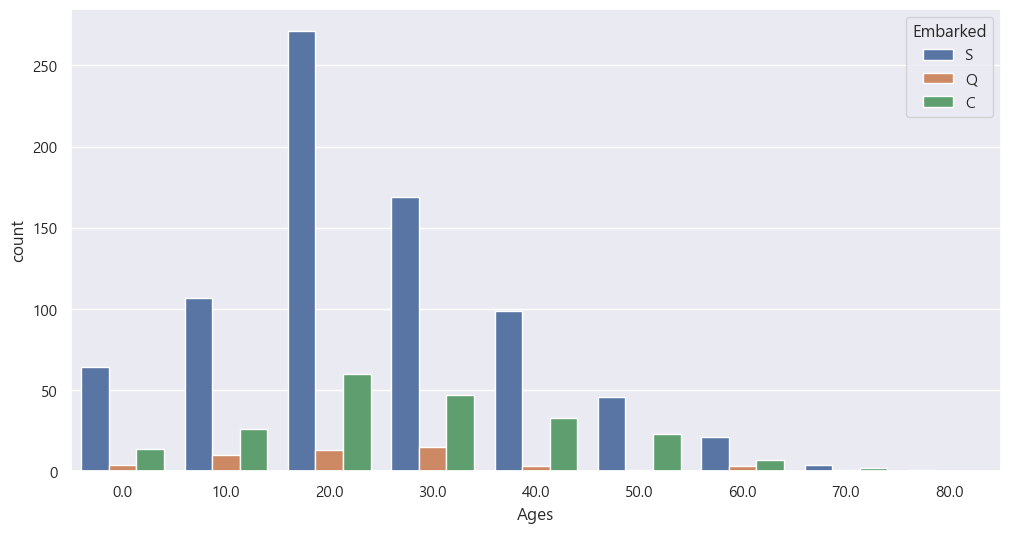

In [20]:
# Ages와 Embarked와의 관계
sns.countplot(data=all_df, x='Ages', hue='Embarked')
plt.show()

- 모든 연령대가 동일하므로 제외한다.

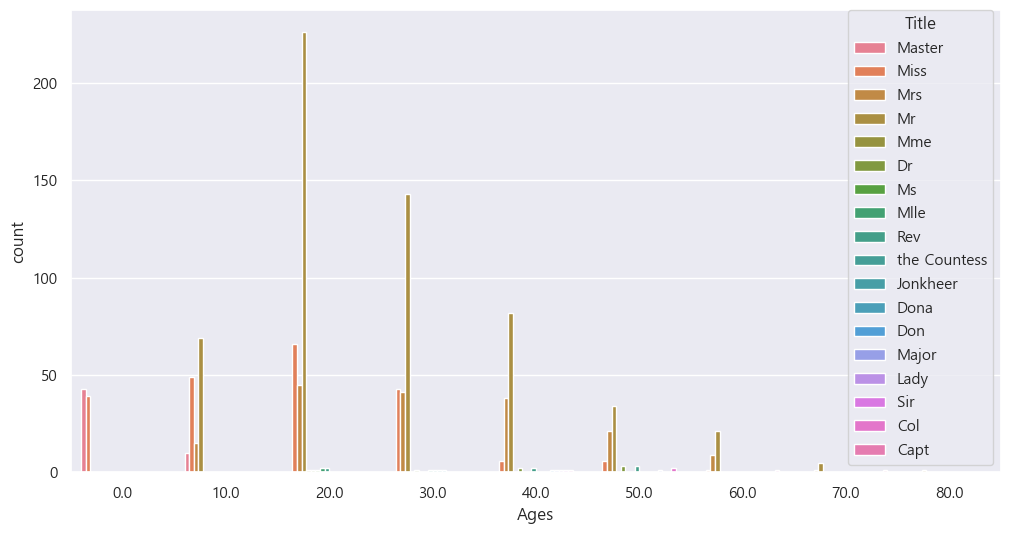

In [21]:
# Ages와 Title과의 관계
sns.countplot(data=all_df, x='Ages', hue='Title')
plt.show()

- title은 제외한다

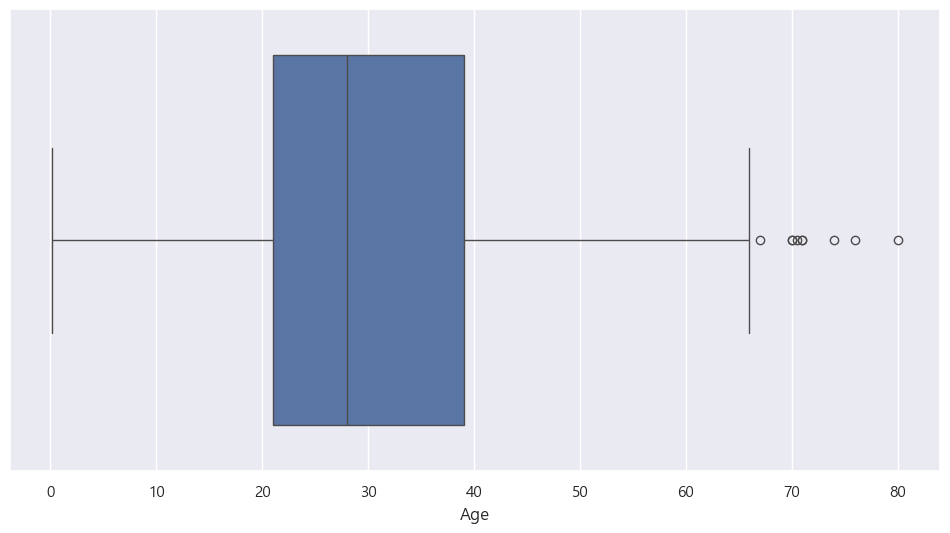

In [22]:
# Survived, Pclass 컬럼을 통해 Ages를 추정한다.
# Age에 극단치 존재 여부를 확인한다.
sns.boxplot(data=all_df, x='Age')
plt.show()

In [23]:
# 극단치가 존재하기 때문에 평균과 중앙값을 구해본다.
a1 = all_df['Age'].mean()
a2 = all_df['Age'].median()

print(f'Age의 평균 : {a1}')
print(f'Age의 중앙값 : {a2}')

Age의 평균 : 29.881137667304014
Age의 중앙값 : 28.0


In [24]:
# Survived와 Pclass를 기분으로 그룹을 나눠 평균을 구한다.
# 예측해야할 데이터는 Survived가 없으므로 Pclass만 가지고 한다.
a1 = all_df[['Age', 'Pclass']]
a2 = a1.groupby(['Pclass'], as_index=False).mean()
a2

,Pclass,Age
0,1,39.159930
1,2,29.506705
2,3,24.816367


In [25]:
# age의 결측치를 채워준다.
idx1 = all_df.query('Pclass == 1 and Age.isna()').index
v1 = a2.query('Pclass == 1')['Age'].iloc[0]
all_df.loc[idx1, 'Age'] = v1

idx1 = all_df.query('Pclass == 2 and Age.isna()').index
v1 = a2.query('Pclass == 2')['Age'].iloc[0]
all_df.loc[idx1, 'Age'] = v1

idx1 = all_df.query('Pclass == 3 and Age.isna()').index
v1 = a2.query('Pclass == 3')['Age'].iloc[0]
all_df.loc[idx1, 'Age'] = v1

all_df['Age'].isna().sum()

0

In [26]:
# 연령대를 다시 구해 담아준다.
# 연령대(Ages) 컬럼을 만들어 붙혀준다.
all_df['Ages'] = all_df['Age'] // 10 * 10
all_df['Ages'].isna().sum()

0

### SibSp

In [27]:
# 결측치 확인
all_df['SibSp'].isna().sum()

0

- 결측치가 없으므로 넘어간다.

### Parch

In [28]:
# 결측치 확인
all_df['Parch'].isna().sum()

0

- 결측치가 없으므로 넘어간다.

### Ticket
- 이 컬럼은 제거한다.
- Ticket 컬럼내의 데이터의 구조가 다른 것들이 너무 많다.
- 앞에 문자를 제거하고 숫자만 본다 해도 티켓 번호의 체계를 알수가 없기 때문에 확인이 어렵다.
- 동일한 티켓 번호가 많지 않다

### Fare

In [29]:
# 결측치 확인
all_df['Fare'].isna().sum()

1

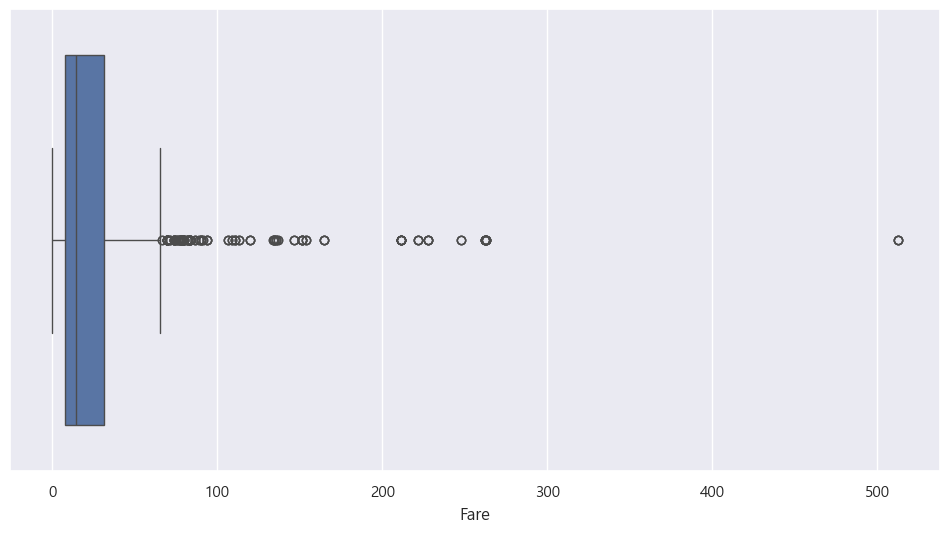

In [30]:
# 극단치를 확인한다.
sns.boxplot(data=all_df, x='Fare')
plt.show()

In [31]:
# 요금의 평균과 중간값을 확인한다.
a1 = all_df['Fare'].mean()
a2 = all_df['Fare'].median()

print(f'Fare의 평균 : {a1}')
print(f'Fare의 중앙값 : {a2}')

Fare의 평균 : 33.29547928134557
Fare의 중앙값 : 14.4542


In [32]:
# Fare의 결측치를 중앙값으로 채워준다
idx1 = all_df.query('Fare.isna()').index
all_df.loc[idx1, 'Fare'] = a2

all_df['Fare'].isna().sum()

0

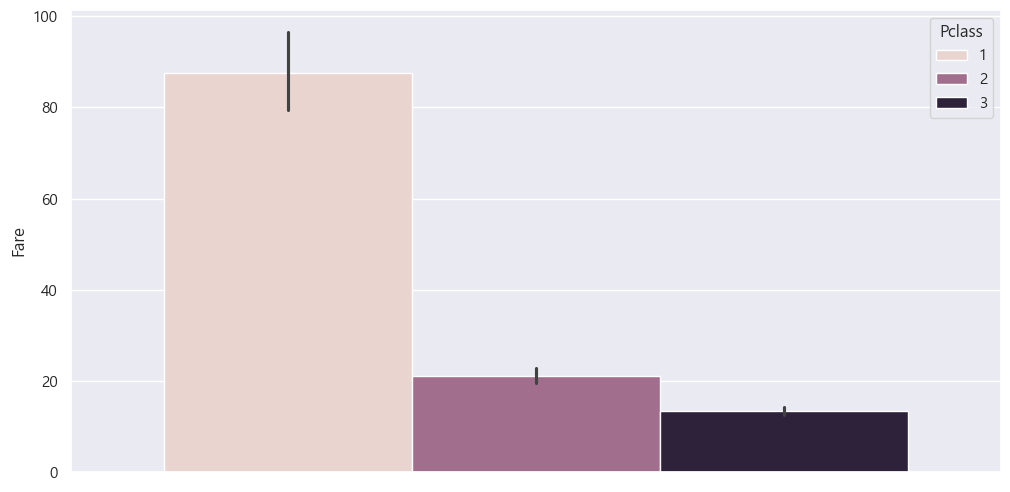

In [33]:
# Pclass와 요금과의 관계
sns.barplot(data=all_df, y='Fare', hue='Pclass')
plt.show()

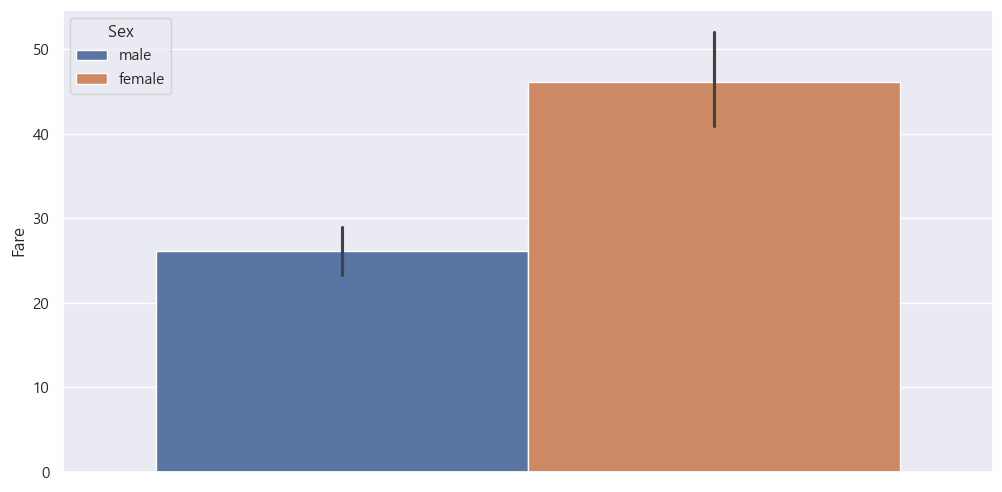

In [34]:
# Sex와 요금과의 관계
sns.barplot(data=all_df, y='Fare', hue='Sex')
plt.show()

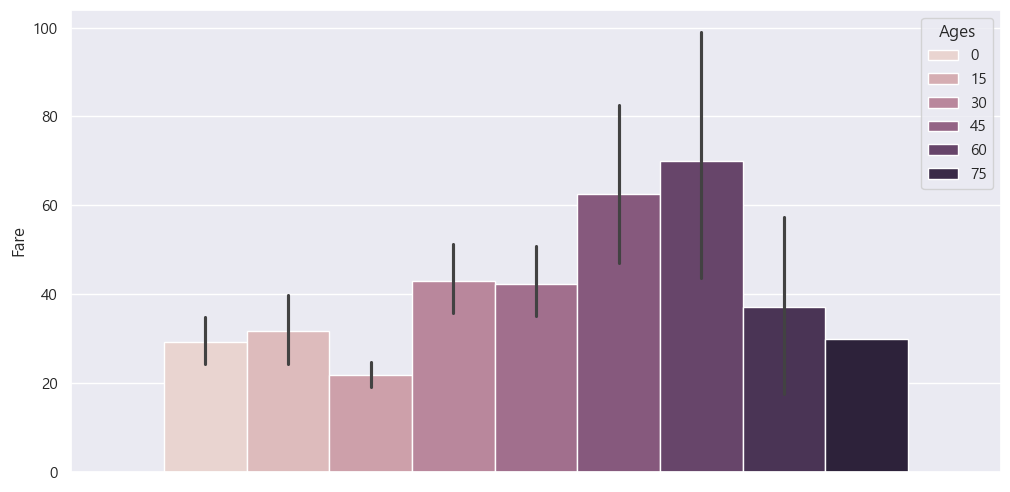

In [35]:
# Ages와 요금과의 관계
sns.barplot(data=all_df, y='Fare', hue='Ages')
plt.show()

In [36]:
# Pclass를 기준으로 요금 등급을 만들 수 있지만 이는 그냥 Pclass와 동일한 값이 된다.
# Plcass + Sex + Ages의 조합으로 요금 구간을 만들어서 사용한다.
# FareGrade 컬럼을 추가한다.
all_df['FareGrade'] = 0

# 요금 구간을 담을 변수
fare_grade = 1

for p1 in [1, 2, 3] :
    for p2  in [0, 10, 20, 30, 40, 50, 60, 70, 80] :
        for p3 in ['male', 'female'] :
            idx1 = all_df.query('Pclass == @p1 and Sex == @p3 and Ages == @p2').index
            all_df.loc[idx1, 'FareGrade'] = fare_grade
            fare_grade = fare_grade + 1

all_df['FareGrade'].value_counts()

FareGrade
41    296
42    114
43     70
23     65
7      62
39     56
8      49
25     42
24     41
9      40
40     36
45     30
37     29
38     27
6      27
44     26
5      25
11     25
26     22
10     22
12     21
27     19
21     16
4      15
13     13
22     13
46     12
28     12
29     11
19     11
20     11
14      8
47      7
3       7
31      6
30      6
15      3
49      3
1       3
51      2
2       1
50      1
17      1
33      1
16      1
32      1
Name: count, dtype: int64

In [37]:
# 각 구간별 요금 평균을 구한다.
# 각 구간별 요금 평균을 담을 컬럼을 추가한다.
all_df['FareAvg'] = 0

for a1 in all_df['FareGrade'].unique() :
    a2 = all_df.query('FareGrade == @a1')
    # 현재 구간의 요금 평균을 가져온다.
    a3 = a2['Fare'].mean()
    # 현재 구간에 해당하는 FareAvg를 설정해준다.
    all_df.loc[a2.index, 'FareAvg'] = a3

all_df['FareAvg'].value_counts()

FareAvg
11.321211     296
14.480411     114
11.151129      70
17.418780      65
64.782258      62
15.019420      56
106.774147     49
19.257440      42
23.742785      41
51.989063      40
13.189939      36
11.479443      30
24.174566      29
20.129315      27
122.412348     27
14.914104      26
77.076668      25
72.280500      25
19.327650      22
106.133532     22
106.564876     21
20.910305      19
28.921875      16
100.741947     15
89.354169      13
21.524677      13
20.298958      12
26.979167      12
16.625000      11
27.386745      11
30.741673      11
112.998437      8
8.672029        7
137.908329      7
18.006250       6
16.083333       6
51.719467       3
9.480567        3
122.636100      3
7.762500        2
151.550000      1
9.587500        1
30.000000       1
10.500000       1
78.850000       1
26.000000       1
Name: count, dtype: int64

In [38]:
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,Ages,FareGrade,FareAvg
0,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,20.0,41,11.321211
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,30.0,8,106.774147
2,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,20.0,42,14.480411
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,30.0,8,106.774147
4,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,30.0,43,11.151129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,24.816367,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,20.0,41,11.321211
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,30.0,8,106.774147
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,30.0,43,11.151129
1307,NaN,3,"Ware, Mr. Frederick",male,24.816367,0,0,359309,8.0500,NaN,S,Ware,Mr,20.0,41,11.321211


### Cabin

In [39]:
# 결측치 확인
all_df['Cabin'].isna().sum()

1014

In [40]:
# 첫 글자를 가져와 CabinArea로 저장한다.
all_df['CabinArea'] = all_df['Cabin'].str[0]
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,Ages,FareGrade,FareAvg,CabinArea
0,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,20.0,41,11.321211,NaN
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,30.0,8,106.774147,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,20.0,42,14.480411,NaN
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,30.0,8,106.774147,C
4,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,30.0,43,11.151129,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,24.816367,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,20.0,41,11.321211,NaN
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,30.0,8,106.774147,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,30.0,43,11.151129,NaN
1307,NaN,3,"Ware, Mr. Frederick",male,24.816367,0,0,359309,8.0500,NaN,S,Ware,Mr,20.0,41,11.321211,NaN


### CabinArea

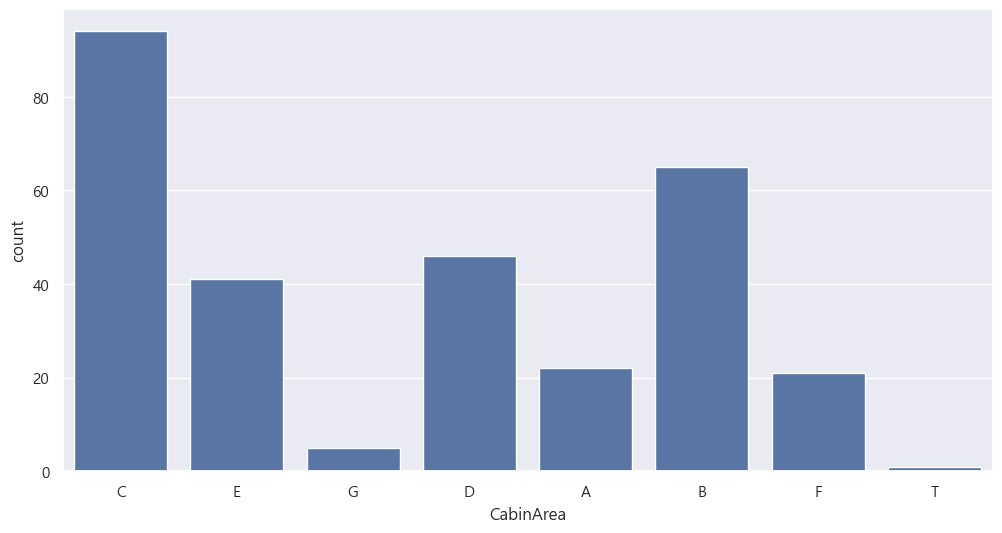

In [41]:
# 데이터 분포
sns.countplot(data=all_df, x='CabinArea')
plt.show()

In [42]:
# 결측치 확인
all_df['CabinArea'].isna().sum()

1014

- Cabin은 날리는 것이 좋다.
- 이번 예제에는 다 살려보는 걸로 가겠습니다.

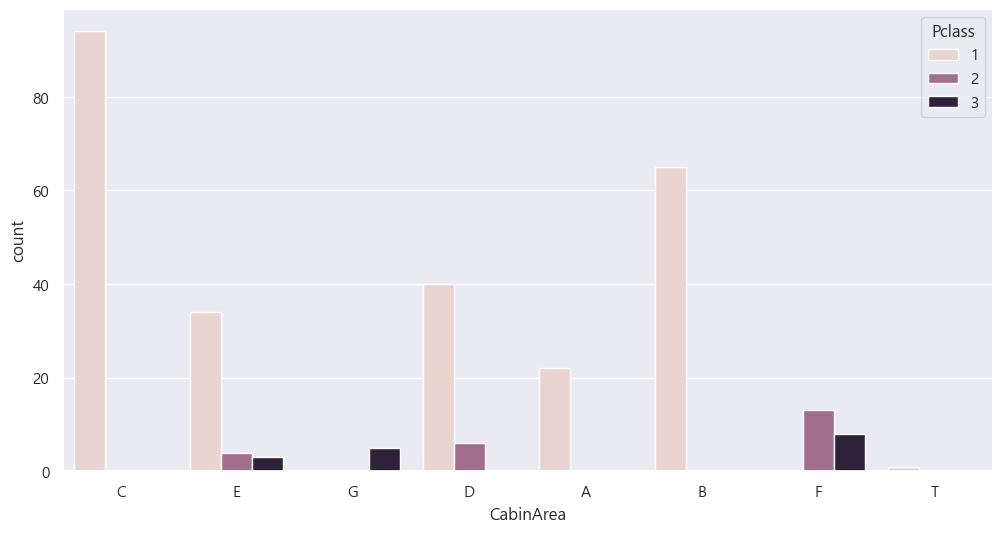

In [43]:
# Pclass와 CabinArea와의 관계
sns.countplot(data=all_df, x='CabinArea', hue='Pclass')
plt.show()

- Pclass에 따라 CabinArea가 조금씩 다른 것을 확인해볼 수 있다.

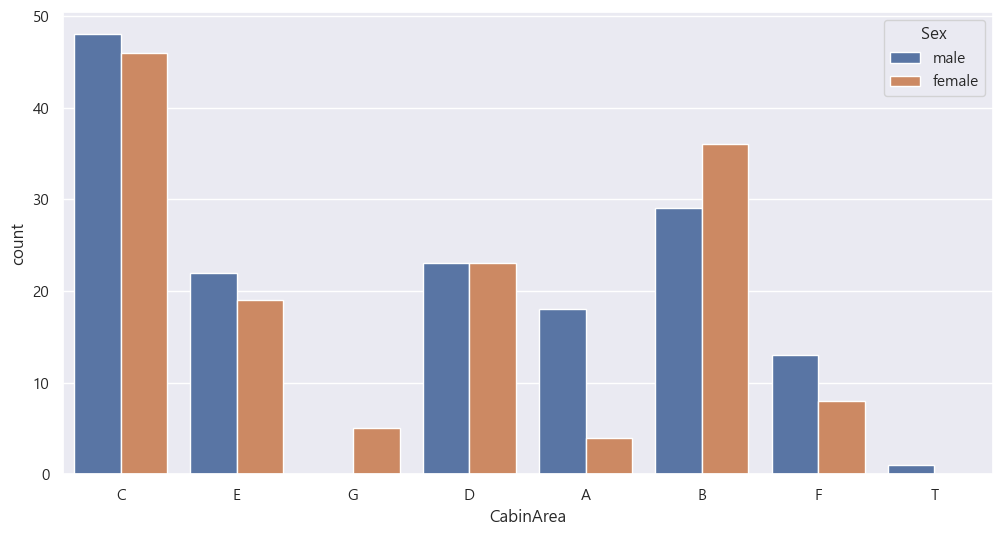

In [44]:
# Sex와의 관계
sns.countplot(data=all_df, x='CabinArea', hue='Sex')
plt.show()

- 성별도 관련이 있어보인다

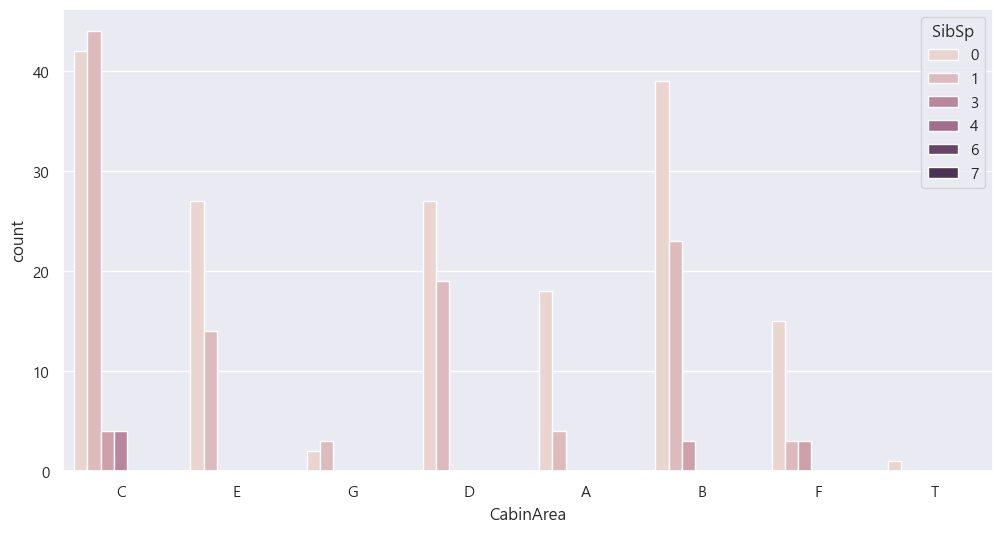

In [45]:
# SibSp와의 관계
sns.countplot(data=all_df, x='CabinArea', hue='SibSp')
plt.show()

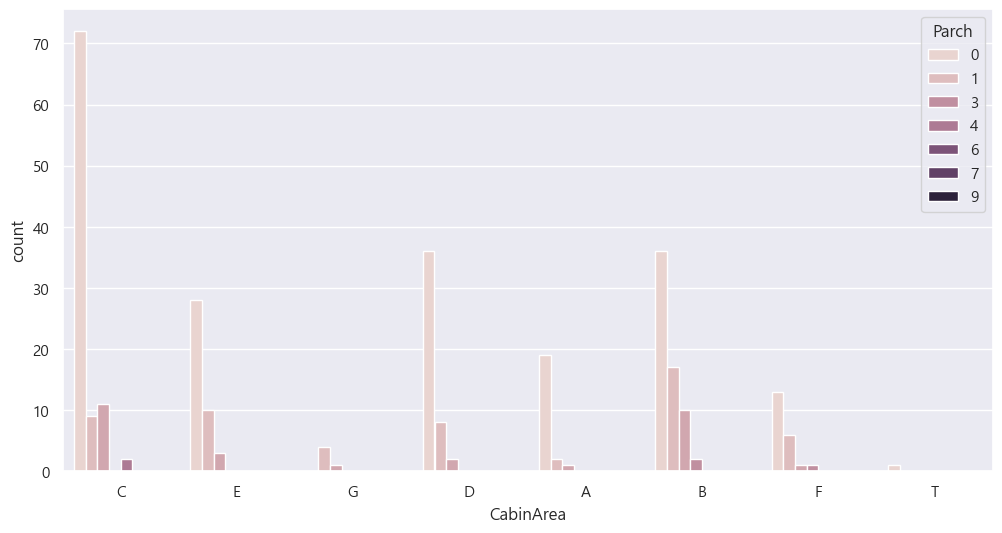

In [46]:
# Parch와의 관계
sns.countplot(data=all_df, x='CabinArea', hue='Parch')
plt.show()

- SibSp와 Parch는 객실에 관계없이 0인 것이 제일 많으므로 제외한다.

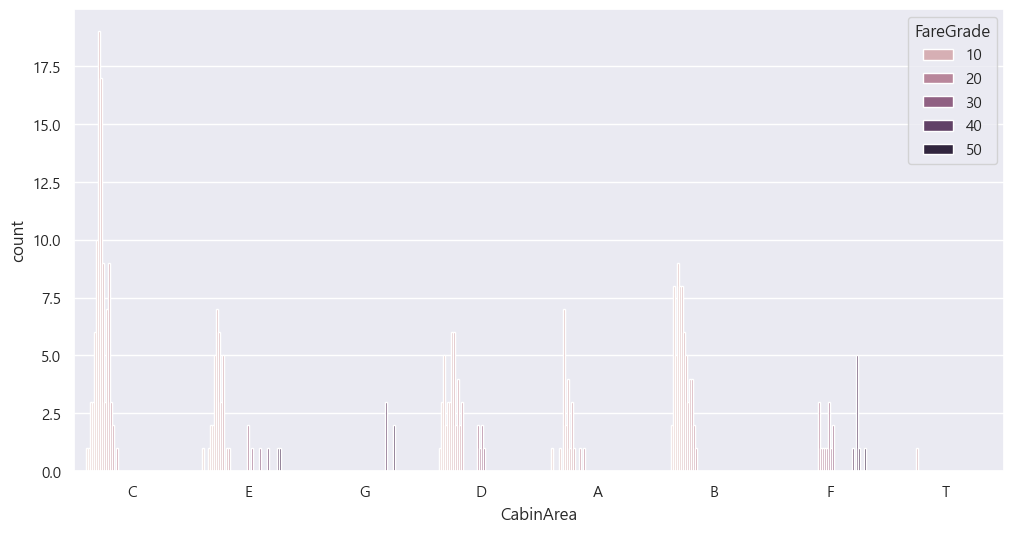

In [47]:
# FareGrade와의 관계
sns.countplot(data=all_df, x='CabinArea', hue='FareGrade')
plt.show()

In [48]:
# 그래프로 보기에는 요금구간 정보가 너무 많다.
# 각 CabinArea별로 요금 구간의 분포를 각각 살펴본다.
temp_dict = {
    
}

for a1 in all_df['CabinArea'].value_counts().index :
    # 현재 객실 구역에 대해 요금 구간 분포를 출력해본다.
    a2 = all_df.query('CabinArea == @a1')
    # 딕셔너리에 객실구역 : 요금 구간 분포 형태로 담아준다.
    temp_dict[a1] = a2['FareGrade'].value_counts().index

temp_dict

{'C': Index([7, 8, 6, 12, 9, 11, 5, 3, 13, 4, 10, 14, 2, 1, 16], dtype='int64', name='FareGrade'),
 'B': Index([6, 8, 4, 7, 9, 5, 10, 13, 12, 11, 3, 14, 15], dtype='int64', name='FareGrade'),
 'D': Index([10, 9, 5, 12, 4, 8, 7, 14, 25, 11, 6, 13, 23, 26, 24, 3], dtype='int64', name='FareGrade'),
 'E': Index([8, 9, 11, 7, 10, 24, 6, 5, 37, 14, 42, 30, 43, 4, 13, 26, 1], dtype='int64', name='FareGrade'),
 'A': Index([7, 9, 11, 8, 5, 15, 1, 10, 17, 12], dtype='int64', name='FareGrade'),
 'F': Index([41, 24, 19, 26, 42, 25, 20, 45, 39, 21, 23, 22], dtype='int64', name='FareGrade'),
 'G': Index([38, 42], dtype='int64', name='FareGrade'),
 'T': Index([9], dtype='int64', name='FareGrade')}

In [49]:
# 각 요금 구역별로 어느 객실에 있는지 확인한다.
# 각 요금 구간별로 객실 지역을 담을 딕셔너리
temp_dict2 = {
}
# 요금 구간별로 반복한다.
for a1 in all_df['FareGrade'].unique() :
    # 해당 요금 구간에 해당하는 객실 구역 정보를 담을 리스트
    temp_list1 = []
    # temp_dict에 가 가지고 있는 데이터 이름을 통해 반복한다.
    for a2 in temp_dict :
        # 현재 요금 구간에 현재 객실 구역이 있다면 리스트에 담아준다.
        if a1 in temp_dict[a2] :
            temp_list1.append(a2)

    temp_dict2[a1] = temp_list1

temp_dict2

{41: ['F'],
 8: ['C', 'B', 'D', 'E', 'A'],
 42: ['E', 'F', 'G'],
 43: ['E'],
 11: ['C', 'B', 'D', 'E', 'A'],
 37: ['E'],
 22: ['F'],
 38: ['G'],
 12: ['C', 'B', 'D', 'A'],
 40: [],
 30: ['E'],
 23: ['D', 'F'],
 44: [],
 25: ['D', 'F'],
 5: ['C', 'B', 'D', 'E', 'A'],
 3: ['C', 'B', 'D'],
 9: ['C', 'B', 'D', 'E', 'A', 'T'],
 31: [],
 46: [],
 24: ['D', 'E', 'F'],
 20: ['F'],
 10: ['C', 'B', 'D', 'E', 'A'],
 13: ['C', 'B', 'D', 'E'],
 7: ['C', 'B', 'D', 'E', 'A'],
 39: ['F'],
 19: ['F'],
 6: ['C', 'B', 'D', 'E'],
 47: [],
 15: ['B', 'A'],
 26: ['D', 'E', 'F'],
 51: [],
 45: ['F'],
 4: ['C', 'B', 'D', 'E'],
 21: ['F'],
 27: [],
 29: [],
 28: [],
 14: ['C', 'B', 'D', 'E'],
 49: [],
 2: ['C'],
 1: ['C', 'E', 'A'],
 50: [],
 17: ['A'],
 33: [],
 16: ['C'],
 32: []}

In [50]:
# 각 요금 구간을 가져온다.
a1 = all_df['FareGrade'].value_counts().index
# 각 요금 구간별 Pclass를 담을 딕셔너리
temp_dict3 = {
}

# 각 요금 구간별로 반복한다.
for a2 in a1 :
    a3 = all_df.query('FareGrade == @a2')['Pclass'].unique()
    temp_dict3[a2] = a3[0]

temp_dict3

{41: 3,
 42: 3,
 43: 3,
 23: 2,
 7: 1,
 39: 3,
 8: 1,
 25: 2,
 24: 2,
 9: 1,
 40: 3,
 45: 3,
 37: 3,
 38: 3,
 6: 1,
 44: 3,
 5: 1,
 11: 1,
 26: 2,
 10: 1,
 12: 1,
 27: 2,
 21: 2,
 4: 1,
 13: 1,
 22: 2,
 46: 3,
 28: 2,
 29: 2,
 19: 2,
 20: 2,
 14: 1,
 47: 3,
 3: 1,
 31: 2,
 30: 2,
 15: 1,
 49: 3,
 1: 1,
 51: 3,
 2: 1,
 50: 3,
 17: 1,
 33: 2,
 16: 1,
 32: 2}

In [51]:
from sklearn.preprocessing import OneHotEncoder

# CabinArea를 통해 원핫 인코더를 학습시킨다.
# 원핫 인코딩 : 하나의 값을 0과 1로 구성된 배열 형태로 만들어주는 작업
# 만약 1, 2, 3 으로 구성되어 있다면...
# 1 -> 1, 0, 0
# 2 -> 0, 1, 0
# 3 -> 0, 0, 1
a1 = all_df['CabinArea'].value_counts().index
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(np.array(a1).reshape(-1, 1))

# 데이터를 담을 리스트
result_list = []

# 각 요금 구간별 객실 구역 딕셔너리의 데이터 수 만큼 반복한다.
for k1 in temp_dict2 :
    # display(temp_dict2[k1])
    if len(temp_dict2[k1]) == 0 :
        k2 = [0.0] * 8
        k2 = [k2]
    else :# 원핫 인코딩을 수행한다.
        k2 = one_hot_encoder.transform(np.array(temp_dict2[k1]).reshape(-1, 1)).toarray()
    # 현재 요금 구간의 Pclass를 가져온다.
    k3 = temp_dict3[k1]
    # 요금 구간, Pclass, 원핫 인코딩된 객실 영역값 형태로 만들어준다.
    # 원핫 인코딩된 결과의 수 만큼 반복한다.
    for k4 in k2 :
        k5 = [k1, k3]
        k5.extend(k4)
        # display(k5)
        # 리스트에 담는다.
        result_list.append(k5)

temp_result_df = pd.DataFrame(result_list)
column_list = ['FareGrade', 'Pclass']
column_list.extend(one_hot_encoder.categories_[0])
temp_result_df.columns = column_list
temp_result_df = temp_result_df.astype('int64')
temp_result_df

,FareGrade,Pclass,A,B,C,D,E,F,G,T
0,41,3,0,0,0,0,0,1,0,0
1,8,1,0,0,1,0,0,0,0,0
2,8,1,0,1,0,0,0,0,0,0
3,8,1,0,0,0,1,0,0,0,0
4,8,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
94,50,3,0,0,0,0,0,0,0,0
95,17,1,1,0,0,0,0,0,0,0
96,33,2,0,0,0,0,0,0,0,0
97,16,1,0,0,1,0,0,0,0,0


In [52]:
temp_total_df = temp_result_df.groupby(['FareGrade', 'Pclass']).sum()
temp_total_df.reset_index(inplace=True)
temp_total_df

,FareGrade,Pclass,A,B,C,D,E,F,G,T
0,1,1,1,0,1,0,1,0,0,0
1,2,1,0,0,1,0,0,0,0,0
2,3,1,0,1,1,1,0,0,0,0
3,4,1,0,1,1,1,1,0,0,0
4,5,1,1,1,1,1,1,0,0,0
5,6,1,0,1,1,1,1,0,0,0
6,7,1,1,1,1,1,1,0,0,0
7,8,1,1,1,1,1,1,0,0,0
8,9,1,1,1,1,1,1,0,0,1
9,10,1,1,1,1,1,1,0,0,0


In [53]:
# FareGrade는 Pclass, Sex, Ages의 조합으로 만들어진 컬럼이다.
# FareGrade를 기반으로 결측치를 채워주면 위의 3가지 조합으로 세분화하여 채워주는 것과 동일한
# 효과를 볼 수 있다.
# 각 객실영역에 해당하는 데이터의 수를 구해 변경해준다.

# index를 하나씩 추출하면서 반복한다.
for idx in temp_total_df.index :
    # idx 번째 행 데이터를 추출한다.
    a1 = temp_total_df.loc[idx]
    # FareGrade를 가져온다.
    a2 = a1.loc['FareGrade']
    # 각 객실영역 값이 0이 아니라면 해당 객실 영역의 데이터 개수를 가져온다.
    # 각 객실 영역값의 수 만큼 반복한다.
    for a100 in one_hot_encoder.categories_[0] :
        # 현재 행의 데이터 에서 객실 영역이 존재하는지의 값을 가져온다.
        a3 = all_df.query('FareGrade == @a2 and CabinArea == @a100')
        # 만약 해당 객실이 존재한다면
        if len(a3) > 0 :
            # 개수를 구해서 출력한다.
            print(f'{a2}, {a100} : {len(a3)}')
    print('-' * 50)

1, A : 1
1, C : 1
1, E : 1
--------------------------------------------------
2, C : 1
--------------------------------------------------
3, B : 2
3, C : 3
3, D : 1
--------------------------------------------------
4, B : 8
4, C : 3
4, D : 3
4, E : 1
--------------------------------------------------
5, A : 1
5, B : 5
5, C : 6
5, D : 5
5, E : 2
--------------------------------------------------
6, B : 9
6, C : 10
6, D : 2
6, E : 2
--------------------------------------------------
7, A : 7
7, B : 8
7, C : 19
7, D : 3
7, E : 5
--------------------------------------------------
8, A : 2
8, B : 8
8, C : 17
8, D : 3
8, E : 7
--------------------------------------------------
9, A : 4
9, B : 6
9, C : 9
9, D : 6
9, E : 6
9, T : 1
--------------------------------------------------
10, A : 1
10, B : 5
10, C : 3
10, D : 6
10, E : 3
--------------------------------------------------
11, A : 3
11, B : 3
11, C : 7
11, D : 2
11, E : 5
--------------------------------------------------
12, A : 1
12

In [54]:
# 위의 결과를 종합하여 FareGrade별 CabinArea는 다음과 같이 채워주도록 하겠다.
dict100 = {
    1 : 'A',
    2 : 'C',
    3 : 'C',
    4 : 'B',
    5 : 'C',
    6 : 'C',
    7 : 'C',
    8 : 'C',
    9 : 'C',
    10 : 'D',
    11 : 'C',
    12 : 'C',
    13 : 'B',
    14 : 'D',
    15 : 'A',
    16 : 'C',
    17 : 'A',
    19 : 'F',
    20 : 'F',
    21 : 'F',
    22 : 'F',
    23 : 'D',
    24 : 'F',
    25 : 'D',
    26 : 'F',
    30 : 'E',
    37 : 'E',
    38 : 'G',
    39 : 'F',
    41 : 'F',
    42 : 'G',
    43 : 'E',
    45 : 'F',
}

# 위의 딕셔너리로 반복문을 사용한다.
for k1, v1 in dict100.items() :
    # FareGrade가 k1이고 CabinArea가 결측치인 곳에 v1으로 채워준다.
    a1 = all_df.query('FareGrade == @k1 and CabinArea.isna()')
    # 가져온 것이 있다면
    if len(a1) > 0 :
        # v1으로 채워준다.
        all_df.loc[a1.index, 'CabinArea'] = v1

all_df['CabinArea'].isna().sum()

137

In [55]:
# 남은 결측치를 확인한다.
all_df.query('CabinArea.isna()')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,Ages,FareGrade,FareAvg,CabinArea
14,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,Vestrom,Miss,10.0,40,13.189939,NaN
18,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,Vander Planke,Mrs,30.0,44,14.914104,NaN
22,1.0,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,McGowan,Miss,10.0,40,13.189939,NaN
25,1.0,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,Asplund,Mrs,30.0,44,14.914104,NaN
33,0.0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,Wheadon,Mr,60.0,31,18.006250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,NaN,3,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",female,30.0,1,0,349910,15.5500,NaN,S,Lindell,Mrs,30.0,44,14.914104,NaN
1264,NaN,2,"Harbeck, Mr. William H",male,44.0,0,0,248746,13.0000,NaN,S,Harbeck,Mr,40.0,27,20.910305,NaN
1274,NaN,3,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19.0,1,0,376566,16.1000,NaN,S,McNamee,Mrs,10.0,40,13.189939,NaN
1278,NaN,2,"Ashby, Mr. John",male,57.0,0,0,244346,13.0000,NaN,S,Ashby,Mr,50.0,29,16.625000,NaN


In [56]:
# 아직 CabinArea가 결측치인 행들의 FareGrade 분포를 살펴본다.
a1 = all_df.query('CabinArea.isna()')
a1['FareGrade'].value_counts()

FareGrade
40    36
44    26
27    19
46    12
28    12
29    11
47     7
31     6
49     3
51     2
50     1
33     1
32     1
Name: count, dtype: int64

In [57]:
# 위에서 얻은 FareGrade에 대한 Pclass를 확인해본다.
a2 = list(a1.index)

a3 = all_df.query('FareGrade in @a2')
# 중복을 제외하고 가져와서 확인한다.
a3[['FareGrade', 'Pclass']].drop_duplicates()

,FareGrade,Pclass
9,22,2
10,38,3
14,40,3
18,44,3
20,25,2
59,39,3
275,14,1
280,49,3
672,33,2


In [58]:
# Pclass별로 CabinArea가 가장 많은 것이 무엇인지 확인한다.
a100 = all_df.query('Pclass == 1')
display(a100['CabinArea'].value_counts())

a100 = all_df.query('Pclass == 2')
display(a100['CabinArea'].value_counts())

a100 = all_df.query('Pclass == 3')
display(a100['CabinArea'].value_counts())

CabinArea
C    153
B     68
D     44
E     34
A     23
T      1
Name: count, dtype: int64

CabinArea
F    111
D    107
E      9
Name: count, dtype: int64

CabinArea
F    383
G    139
E    100
Name: count, dtype: int64

In [59]:
# Pclass가 1인 CabinArea는 C 로 채워준다.
a1 = all_df.query('Pclass == 1 and CabinArea.isna()')
all_df.loc[a1.index, 'CabinArea'] = 'C'
# Pclass가 2 또는 3인 CabinArea는 F로 채워준다.
a1 = all_df.query('(Pclass == 2 or Pclass == 3) and CabinArea.isna()')
all_df.loc[a1.index, 'CabinArea'] = 'F'

all_df['CabinArea'].isna().sum()

0

In [60]:
# CabinArea의 도수 분포를 확인한다.
all_df['CabinArea'].value_counts()

CabinArea
F    631
C    153
D    151
E    143
G    139
B     68
A     23
T      1
Name: count, dtype: int64

### Embarked

In [61]:
# 결측치 확인
all_df['Embarked'].isna().sum()

2

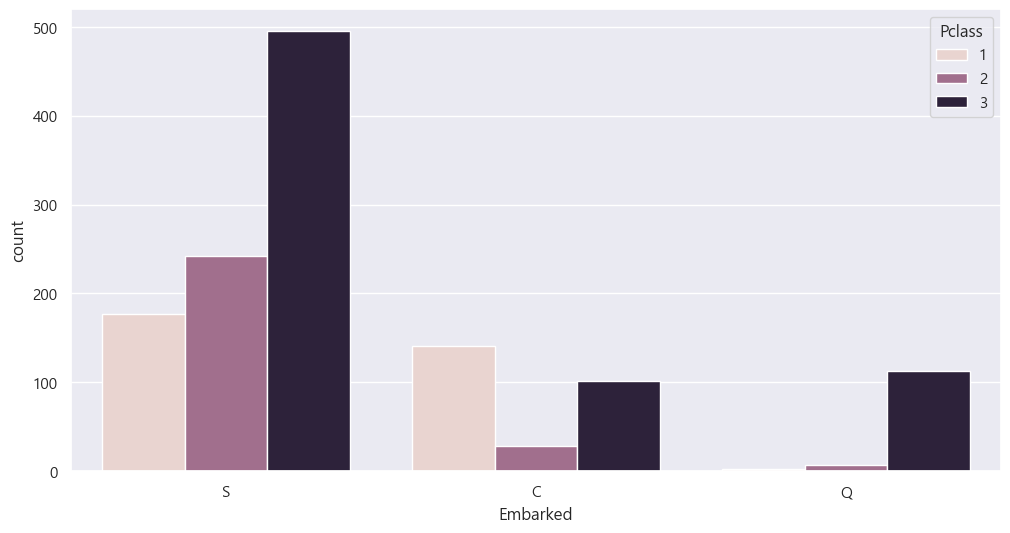

In [62]:
# Pclass와의 관계
sns.countplot(data=all_df, x='Embarked', hue='Pclass')
plt.show()

In [63]:
# S 항구가 모든 Pclass에 대해 많기 때문에 S로 채워준다.
a100 = all_df.query('Embarked.isna()')
all_df.loc[a100.index, 'Embarked'] = 'S'

all_df['Embarked'].isna().sum()

0

### 불필요한 컬럼을 제거하고 저장한다.

In [64]:
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,Ages,FareGrade,FareAvg,CabinArea
0,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,20.0,41,11.321211,F
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,30.0,8,106.774147,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,20.0,42,14.480411,G
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,30.0,8,106.774147,C
4,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,30.0,43,11.151129,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,24.816367,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,20.0,41,11.321211,F
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,30.0,8,106.774147,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,30.0,43,11.151129,E
1307,NaN,3,"Ware, Mr. Frederick",male,24.816367,0,0,359309,8.0500,NaN,S,Ware,Mr,20.0,41,11.321211,F


In [65]:
# 불필요한 컬럼 제거
all_df.drop(['Name', 'Age', 'Ticket', 'Cabin', 'FareAvg'], axis=1, inplace=True)
all_df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,LastName,Title,Ages,FareGrade,CabinArea
0,0.0,3,male,1,0,7.2500,S,Braund,Mr,20.0,41,F
1,1.0,1,female,1,0,71.2833,C,Cumings,Mrs,30.0,8,C
2,1.0,3,female,0,0,7.9250,S,Heikkinen,Miss,20.0,42,G
3,1.0,1,female,1,0,53.1000,S,Futrelle,Mrs,30.0,8,C
4,0.0,3,male,0,0,8.0500,S,Allen,Mr,30.0,43,E
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,0,0,8.0500,S,Spector,Mr,20.0,41,F
1305,NaN,1,female,0,0,108.9000,C,Oliva y Ocana,Dona,30.0,8,C
1306,NaN,3,male,0,0,7.2500,S,Saether,Mr,30.0,43,E
1307,NaN,3,male,0,0,8.0500,S,Ware,Mr,20.0,41,F


In [66]:
# 학습 데이터와 예측할 데이터로 나눈다.
train_df = all_df.query('Survived.notna()')
train_df.reset_index(inplace=True, drop=True)

test_df = all_df.query('Survived.isna()')
test_df.drop('Survived', axis=1, inplace=True)
test_df.reset_index(inplace=True, drop=True)

display(train_df)
display(test_df)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,LastName,Title,Ages,FareGrade,CabinArea
0,0.0,3,male,1,0,7.2500,S,Braund,Mr,20.0,41,F
1,1.0,1,female,1,0,71.2833,C,Cumings,Mrs,30.0,8,C
2,1.0,3,female,0,0,7.9250,S,Heikkinen,Miss,20.0,42,G
3,1.0,1,female,1,0,53.1000,S,Futrelle,Mrs,30.0,8,C
4,0.0,3,male,0,0,8.0500,S,Allen,Mr,30.0,43,E
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,male,0,0,13.0000,S,Montvila,Rev,20.0,23,D
887,1.0,1,female,0,0,30.0000,S,Graham,Miss,10.0,4,B
888,0.0,3,female,1,2,23.4500,S,Johnston,Miss,20.0,42,G
889,1.0,1,male,0,0,30.0000,C,Behr,Mr,20.0,5,C


,Pclass,Sex,SibSp,Parch,Fare,Embarked,LastName,Title,Ages,FareGrade,CabinArea
0,3,male,0,0,7.8292,Q,Kelly,Mr,30.0,43,E
1,3,female,1,0,7.0000,S,Wilkes,Mrs,40.0,46,F
2,2,male,0,0,9.6875,Q,Myles,Mr,60.0,31,F
3,3,male,0,0,8.6625,S,Wirz,Mr,20.0,41,F
4,3,female,1,1,12.2875,S,Hirvonen,Mrs,20.0,42,G
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,0,0,8.0500,S,Spector,Mr,20.0,41,F
414,1,female,0,0,108.9000,C,Oliva y Ocana,Dona,30.0,8,C
415,3,male,0,0,7.2500,S,Saether,Mr,30.0,43,E
416,3,male,0,0,8.0500,S,Ware,Mr,20.0,41,F


In [67]:
train_df.to_csv('data/train100.csv', index=False)
test_df.to_csv('data/test100.csv', index=False)

In [68]:
train_df2 = pd.read_csv('data/train100.csv')
test_df2 = pd.read_csv('data/test100.csv')

display(train_df2)
display(test_df2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,LastName,Title,Ages,FareGrade,CabinArea
0,0.0,3,male,1,0,7.2500,S,Braund,Mr,20.0,41,F
1,1.0,1,female,1,0,71.2833,C,Cumings,Mrs,30.0,8,C
2,1.0,3,female,0,0,7.9250,S,Heikkinen,Miss,20.0,42,G
3,1.0,1,female,1,0,53.1000,S,Futrelle,Mrs,30.0,8,C
4,0.0,3,male,0,0,8.0500,S,Allen,Mr,30.0,43,E
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,male,0,0,13.0000,S,Montvila,Rev,20.0,23,D
887,1.0,1,female,0,0,30.0000,S,Graham,Miss,10.0,4,B
888,0.0,3,female,1,2,23.4500,S,Johnston,Miss,20.0,42,G
889,1.0,1,male,0,0,30.0000,C,Behr,Mr,20.0,5,C


,Pclass,Sex,SibSp,Parch,Fare,Embarked,LastName,Title,Ages,FareGrade,CabinArea
0,3,male,0,0,7.8292,Q,Kelly,Mr,30.0,43,E
1,3,female,1,0,7.0000,S,Wilkes,Mrs,40.0,46,F
2,2,male,0,0,9.6875,Q,Myles,Mr,60.0,31,F
3,3,male,0,0,8.6625,S,Wirz,Mr,20.0,41,F
4,3,female,1,1,12.2875,S,Hirvonen,Mrs,20.0,42,G
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,0,0,8.0500,S,Spector,Mr,20.0,41,F
414,1,female,0,0,108.9000,C,Oliva y Ocana,Dona,30.0,8,C
415,3,male,0,0,7.2500,S,Saether,Mr,30.0,43,E
416,3,male,0,0,8.0500,S,Ware,Mr,20.0,41,F
